In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Load the data

In [2]:
DATA_PATH = 'juniorMLE_dataset.csv'
question_data = pd.read_csv(DATA_PATH, ',')

In [3]:
# Verify that data was loaded.
question_data

,IsQuestionForCommunity,VerifiedBuyers,VisitsLastYear,QuestionTextLength,ProductGroup1Id,BrandId,CategoryManagementTeamBudgetingGroupId,CategoryManagementTeamId,QuestionText,ProductLifecycleDays,...,VerifiedBuyersLastYear,VerifiedBuyersWithLanguage,VerifiedBuyersWithLanguageAnswersTotalScore,VerifiedBuyersWithLanguageBestAnswers,VerifiedBuyersWithLanguageHaveAnswered,VerifiedBuyersWithLanguageLastMonth,VerifiedBuyersWithLanguageLastYear,VerifiedBuyersWithLanguageTotalAnswers,VerifiedBuyersWithLanguageTotalAnswersAsVerifiedBuyers,VisitsLastMonth
0,1,44,65724,77,1,15151,23,5,Geht die Kamera beim Klingeln an oder auch wen...,166,...,44,30,5,12,11,4,30,48,41,364
1,1,2,18,89,80,16030,18,8,Welche Häkelnadel kann man für dieses Garn bra...,1239,...,0,2,0,1,2,0,0,4,3,6
2,1,38,1324,40,80,778,46,8,Handelt es sich bei der flasche um glas?,117,...,38,33,2,1,2,29,33,11,11,961
3,0,47,145,155,388,378,71,4,Genau nach 3 Jahren habe ich einen defekten Bi...,1356,...,1,37,4,0,5,0,1,5,2,2
4,0,37,3127,139,389,5,56,3,"Überall steht, dass dieser Rechner sehr laut s...",77,...,37,32,4,7,8,10,32,22,22,1576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72427,1,251,5432,8,80,1145,46,8,Made in?,367,...,251,145,13,11,17,18,145,64,49,763
72428,1,116,8540,171,389,4,57,10,Guten Abend. Wie lang sind die Schläuche? Dies...,378,...,116,86,28,21,17,23,86,100,89,1545
72429,1,3024,4269,124,29,4771,17,11,Mir ist nicht klar was ich für 8.10 CHF erhalt...,1728,...,1525,2185,789,482,448,43,989,2305,1345,202
72430,1,59,5261,227,389,11473,31,10,Ist der tisch tatsächlich 82cm hoch?? Oder ist...,699,...,44,43,4,4,12,11,31,25,21,1434


In [4]:
LABEL = 'IsQuestionForCommunity'
FEATURE_1 = 'VisitsLastYear'
FEATURE_2 = 'QuestionTextLength'

In [5]:
# Exctract desired columns from data frame.
df = question_data.loc[:, [LABEL, FEATURE_1, FEATURE_2]]

In [6]:
# Verify.
df

,IsQuestionForCommunity,VisitsLastYear,QuestionTextLength
0,1,65724,77
1,1,18,89
2,1,1324,40
3,0,145,155
4,0,3127,139
...,...,...,...
72427,1,5432,8
72428,1,8540,171
72429,1,4269,124
72430,1,5261,227


## Inspect the data

In [7]:
# Check for missing values.
df.isna().any()

IsQuestionForCommunity    False
VisitsLastYear            False
QuestionTextLength        False
dtype: bool

In [8]:
# Count positive and negative samples.
pos_samples = df.loc[df['IsQuestionForCommunity'] == 1]
neg_samples = df.loc[df['IsQuestionForCommunity'] == 0]

In [9]:
len(pos_samples)

45537

In [10]:
len(neg_samples)

26895

<AxesSubplot:xlabel='VisitsLastYear', ylabel='QuestionTextLength'>

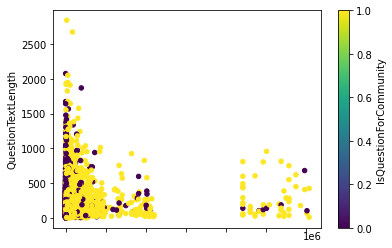

In [11]:
# Plot the data.
df.plot(x=FEATURE_1, y=FEATURE_2, c=LABEL, colormap='viridis', kind='scatter')

## Train Decision Tree Classifier

### Do a stratified train / test split.

In [12]:
data_X = np.array(df.loc[:, [FEATURE_1, FEATURE_2]])
data_y = np.array(df.loc[:, [LABEL]]).flatten()
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, stratify=data_y, shuffle=True, random_state=37)

### Verify stratified sampling

In [13]:
len(y_train[y_train == 1]) / len(y_train[y_train == 0])

1.6931121026213052

In [14]:
len(y_test[y_test == 1]) / len(y_test[y_test == 0])

1.6932515337423313

Close 'nuff.

### Create and fit model

In [15]:
clf = DecisionTreeClassifier(max_depth=2, random_state=37)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=37)

### Check accuracy for training set

In [16]:
accuracy_train = clf.score(X_train, y_train)
accuracy_train

0.7370092328932608

## Evaluate Classifier

### Check accuracy for test set

In [17]:
accuracy_test = clf.score(X_test, y_test)
accuracy_test

0.7372126734313522

### Visualize classifier

<AxesSubplot:>

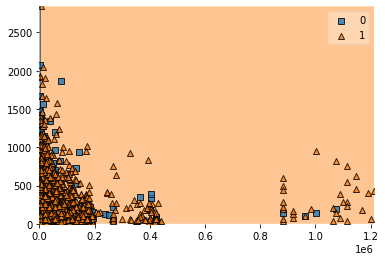

In [18]:
plot_decision_regions(X_train, y_train, clf)

[Text(167.4, 181.2, 'X[0] <= 908.5\ngini = 0.467\nsamples = 57945\nvalue = [21516, 36429]'),
 Text(83.7, 108.72, 'X[0] <= 270.5\ngini = 0.448\nsamples = 19521\nvalue = [12899, 6622]'),
 Text(41.85, 36.23999999999998, 'gini = 0.343\nsamples = 8994\nvalue = [7013, 1981]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.493\nsamples = 10527\nvalue = [5886, 4641]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 2677.5\ngini = 0.348\nsamples = 38424\nvalue = [8617, 29807]'),
 Text(209.25, 36.23999999999998, 'gini = 0.452\nsamples = 12074\nvalue = [4174, 7900]'),
 Text(292.95, 36.23999999999998, 'gini = 0.28\nsamples = 26350\nvalue = [4443, 21907]')]

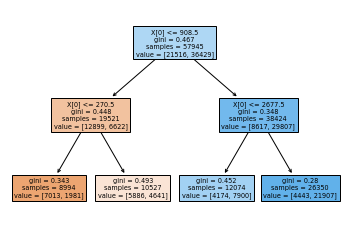

In [19]:
plot_tree(clf, filled=True)

## Save model

In [20]:
from joblib import dump # Recommended by Sklearn docs over pickle.
dump(clf, 'model.joblib')

['model.joblib']